In [149]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import copy
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textstat.textstat import textstat

# Clustering packages
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

# Plotting Packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pylab
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight')
%matplotlib inline
from wordcloud import WordCloud



In [10]:
df = pd.read_csv('full.csv')


In [8]:
df.shape

(24634, 7)

In [12]:
df.tail()

,user,timestamp,commentText,y_label,likes,hasReplies,replies.commentText
24629,geminilicious,1525280205262,MIDDLE GROUND IS THE WAY TO GO\n\nEdit: middle...,NaN,217,True,NaN
24630,gremdi,1525280205264,2:06 ima take the shit out that life i love meat,NaN,1,False,NaN
24631,not you,1525280205266,THE GUY WITH ORANGE SCARF IN HIS HEAD IN THE 1...,NaN,0,False,NaN
24632,Allen Owobu,1525280205268,Vegans...need meat dont @ me,NaN,31,True,NaN
24633,gremdi,1525280205270,Vegans are delusional,NaN,1,False,NaN


In [14]:
print(df['commentText'].count())
print(df['y_label'].count())

24634
1598


In [61]:
# "i am vegan"
df[df['commentText'].str.lower().str.contains('i am vegan')].shape


(41, 8)

In [66]:
df[df['commentText'].str.lower().str.contains('i was vegan')].shape

(33, 8)

In [15]:
df.isnull().sum()

user                       2
timestamp                  0
commentText                0
y_label                23036
likes                      0
hasReplies                 0
replies.commentText    24634
dtype: int64

In [33]:
X = df[df['y_label'].notnull()]['commentText']
y = df[df['y_label'].notnull()]['y_label']

In [41]:
# Baseline Accuracy
y.value_counts()/df.shape[0]

0    0.059349
1    0.005521
Name: y_label, dtype: float64

24634

In [34]:
# df[df['y_label']=='0:00']
y.unique()

array(['0', '1'], dtype=object)

In [32]:
df.loc[698,'y_label']='0'

In [ ]:
# how to balance classes
# random sampling with replacement of target class

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    stratify=y)

In [37]:
# Random Forest and TFIDF

tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
Trees = RandomForestClassifier()

pipe = Pipeline([
    ('tfidf', tf),
    ('trees', Trees)
])

gs = GridSearchCV(pipe, param_grid = {})

gs.fit(X_train, y_train)

print('Grid Search Best Score:', gs.best_score_)
print('Test Score:', gs.score(X_test, y_test))



/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Grid Search Best Score: 0.9148580968280468
Test Score: 0.915


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
best_rf = gs.best_estimator_
# new_X = df[df['y_label'].isnull()]['commentText']
preds = best_rf.predict(df['commentText'])



In [47]:
df['preds']=preds

In [49]:
df.tail()

,user,timestamp,commentText,y_label,likes,hasReplies,replies.commentText,preds
24629,geminilicious,1525280205262,MIDDLE GROUND IS THE WAY TO GO\n\nEdit: middle...,NaN,217,True,NaN,0
24630,gremdi,1525280205264,2:06 ima take the shit out that life i love meat,NaN,1,False,NaN,0
24631,not you,1525280205266,THE GUY WITH ORANGE SCARF IN HIS HEAD IN THE 1...,NaN,0,False,NaN,0
24632,Allen Owobu,1525280205268,Vegans...need meat dont @ me,NaN,31,True,NaN,0
24633,gremdi,1525280205270,Vegans are delusional,NaN,1,False,NaN,0


In [54]:
df[df['y_label'].isnull()].preds.value_counts()

0    23014
1       22
Name: preds, dtype: int64

In [67]:
df.preds.value_counts()

0    24528
1      106
Name: preds, dtype: int64

In [73]:
sid = SentimentIntensityAnalyzer()
df['scores'] = df['commentText'].apply(lambda x: sid.polarity_scores(x))

In [101]:

df['word_count'] = df['commentText'].str.split().str.len()

In [74]:
df.head()

,user,timestamp,commentText,y_label,likes,hasReplies,replies.commentText,preds,scores
0,Yasmin Sallam,1556813178506,"Ok so I’m muslim, so we only eat halal foods,w...",0,0,False,NaN,0,"{'neg': 0.175, 'neu': 0.593, 'pos': 0.232, 'co..."
1,Tara Z,1556812818508,"As a vegan, I felt very uncomfortable with wat...",1,1,False,NaN,1,"{'neg': 0.135, 'neu': 0.598, 'pos': 0.267, 'co..."
2,QueenEm,1556807658510,"In all honesty, vegan eating is actually more ...",0,0,False,NaN,0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp..."
3,Jenda Mh,1556804058512,"Enjoying my steak while watching this, remembe...",0,0,False,NaN,0,"{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp..."
4,Cavalio Thorson,1556800458514,That girl is the type to try and make me feel ...,0,2,False,NaN,0,"{'neg': 0.132, 'neu': 0.868, 'pos': 0.0, 'comp..."


In [75]:

df = df.join(pd.DataFrame(df['scores'].to_dict()).T)

In [76]:

df = df.drop('scores', axis = 1)

In [77]:
df['diff'] = df['pos'] - df['neg']

In [79]:
df['reading_ease'] = df['commentText'].apply(lambda x: textstat.flesch_reading_ease(x))

In [80]:
df['grade_level'] = df['commentText'].apply(lambda x: textstat.flesch_kincaid_grade(x))

In [85]:
# only run once
# df.to_csv('df_word_features_0516.csv', index = False, encoding = 'utf-8')


In [89]:
df2 = pd.read_csv('df_word_features_0516.csv')
df.head()

,user,timestamp,commentText,y_label,likes,hasReplies,replies.commentText,preds,compound,neg,neu,pos,diff,reading_ease,grade_level
0,Yasmin Sallam,1556813178506,"Ok so I’m muslim, so we only eat halal foods,w...",0,0,False,NaN,0,0.2933,0.175,0.593,0.232,0.057,45.43,21.6
1,Tara Z,1556812818508,"As a vegan, I felt very uncomfortable with wat...",1,1,False,NaN,1,0.8346,0.135,0.598,0.267,0.132,69.18,6.2
2,QueenEm,1556807658510,"In all honesty, vegan eating is actually more ...",0,0,False,NaN,0,0.4569,0.000,0.834,0.166,0.166,68.26,6.6
3,Jenda Mh,1556804058512,"Enjoying my steak while watching this, remembe...",0,0,False,NaN,0,0.9042,0.000,0.621,0.379,0.379,63.02,10.7
4,Cavalio Thorson,1556800458514,That girl is the type to try and make me feel ...,0,2,False,NaN,0,-0.5423,0.132,0.868,0.000,-0.132,70.47,9.9


In [90]:
df['target'] = [1 if x > 0 else 0 for x in df['diff']]

In [91]:
df.shape

(24634, 16)

In [92]:

cvec = CountVectorizer(stop_words = 'english', min_df = 20, token_pattern = u'(\\b[a-zA-Z]+\\b)')
cvec.fit(df['commentText'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=20,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(\\b[a-zA-Z]+\\b)',
        tokenizer=None, vocabulary=None)

In [147]:
vectored = pd.DataFrame(cvec.transform(df['commentText']).todense(), columns = cvec.get_feature_names())
vectored.transpose().sort_values(0, ascending = False).head(15).transpose()

vectored.head()


,ability,able,abortion,absolute,absolutely,abuse,accept,access,accessible,according,...,yea,yeah,year,years,yelling,yes,yo,young,youre,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
vectored.shape

(24634, 1663)

In [95]:
# RUN ONCE ONLY!
# vectored.to_csv('vectored_0516.csv', index = False, encoding = 'utf-8')


In [96]:
vectored = pd.read_csv('vectored_0516.csv')

In [97]:
vectored.shape

(24634, 1663)

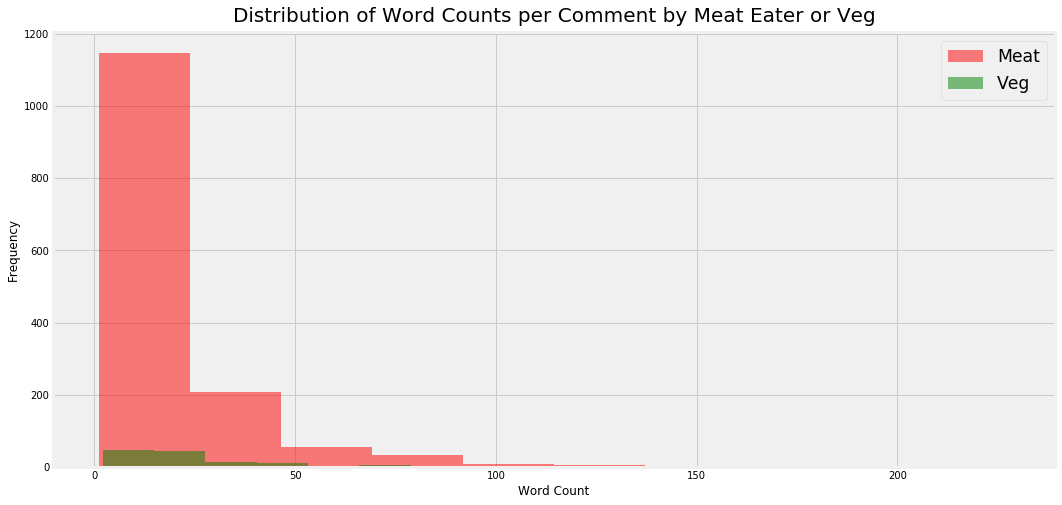

In [143]:

plt.figure(figsize = (16, 8))
df.loc[df['y_label'] == '0', 'word_count'].hist(color = 'red', alpha = .5, label = 'Meat')
df.loc[df['y_label'] == '1', 'word_count'].hist(color = 'green', alpha = .5, label = 'Veg')

plt.title('Distribution of Word Counts per Comment by Meat Eater or Veg', fontsize = 20, y = 1.01)
plt.xlabel('Word Count')
# plt.xlim([df['word_count'].min(), df['word_count'].max()])
plt.ylabel('Frequency')
plt.legend(loc = 'best',fontsize='xx-large');

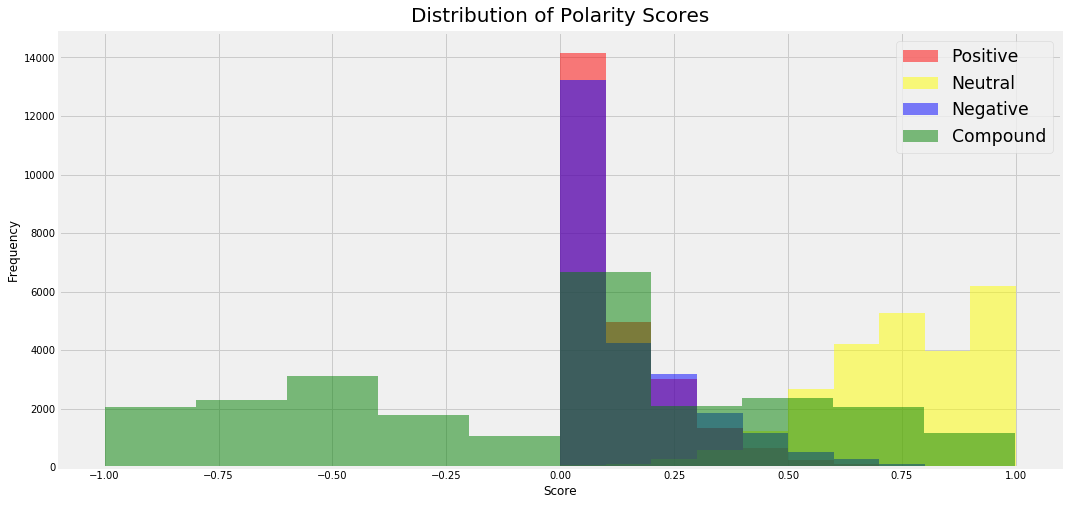

In [113]:

plt.figure(figsize = (16, 8))
df['pos'].hist(color = 'red', alpha = .5, label = 'Positive')
df['neu'].hist(color = 'yellow', alpha = .5, label = 'Neutral')
df['neg'].hist(color = 'blue', alpha = .5, label = 'Negative')
df['compound'].hist(color = 'green', alpha = .5, label = 'Compound')
plt.title('Distribution of Polarity Scores', fontsize = 20, y = 1.01)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(loc = 'best', fontsize='xx-large');

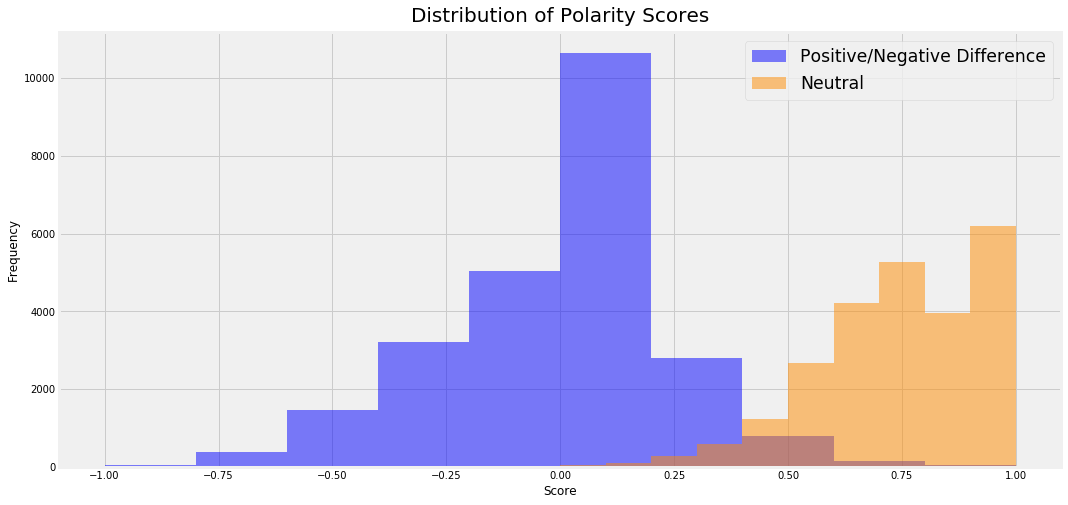

In [129]:
plt.figure(figsize = (16, 8))
df['diff'].hist(color = 'blue', alpha = .5, label = 'Positive/Negative Difference')
df['neu'].hist(color = 'darkorange', alpha = .5, label = 'Neutral')
plt.title('Distribution of Polarity Scores', fontsize = 20, y = 1.01)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(loc = 'best', fontsize='xx-large');

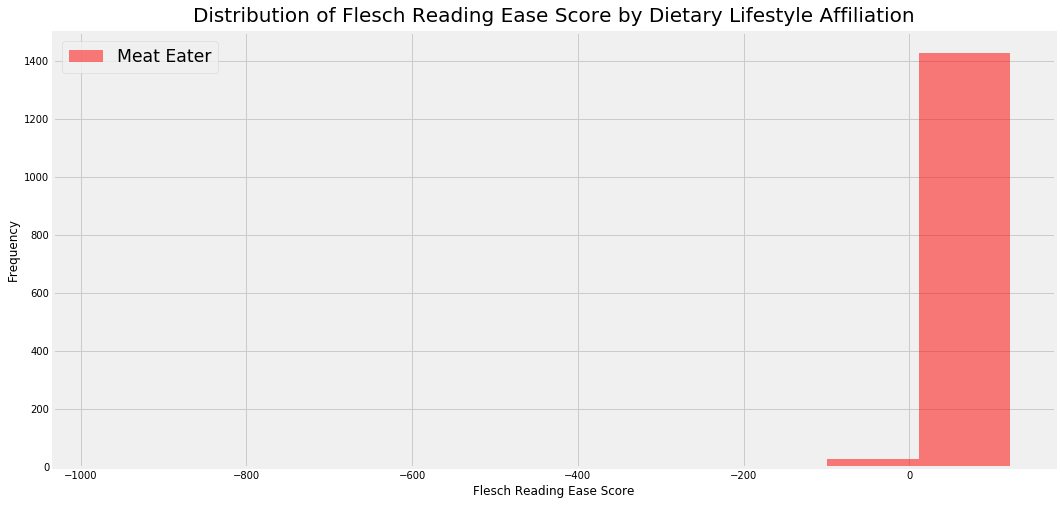

In [144]:
plt.figure(figsize = (16, 8))
df.loc[df['y_label'] == '0', 'reading_ease'].hist(color = 'red', alpha = .5, label = 'Meat Eater')
plt.title('Distribution of Flesch Reading Ease Score by Dietary Lifestyle Affiliation', fontsize = 20, y = 1.01)
plt.xlabel('Flesch Reading Ease Score')
# plt.xlim([df['reading_ease'].min(), df['reading_ease'].max()])
plt.ylabel('Frequency')
plt.legend(loc = 'best',fontsize='xx-large')


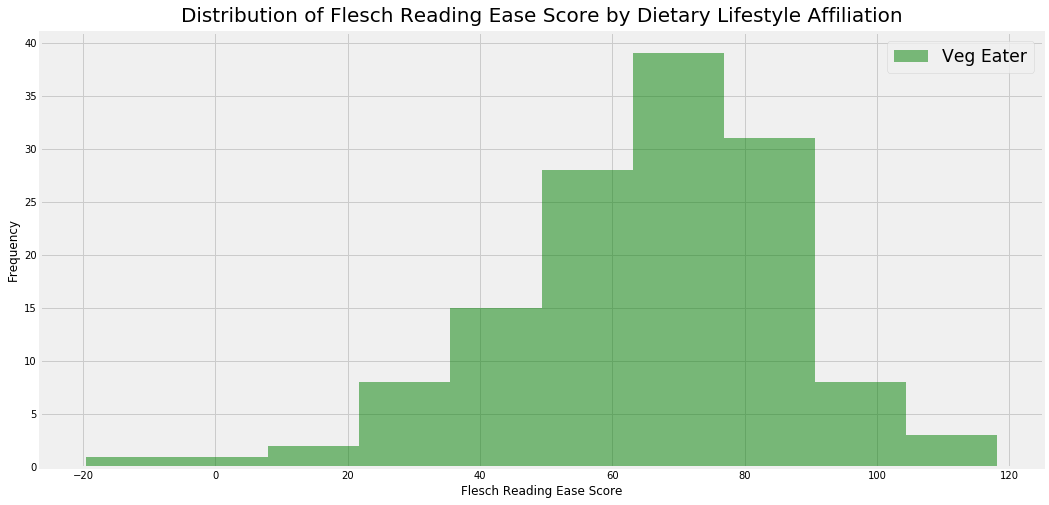

In [145]:
plt.figure(figsize = (16, 8))
df.loc[df['y_label'] == '1', 'reading_ease'].hist(color = 'green', alpha = .5, label = 'Veg Eater')
plt.title('Distribution of Flesch Reading Ease Score by Dietary Lifestyle Affiliation', fontsize = 20, y = 1.01)
plt.xlabel('Flesch Reading Ease Score')
# plt.xlim([df['reading_ease'].min(), df['reading_ease'].max()])
plt.ylabel('Frequency')
plt.legend(loc = 'best',fontsize='xx-large')

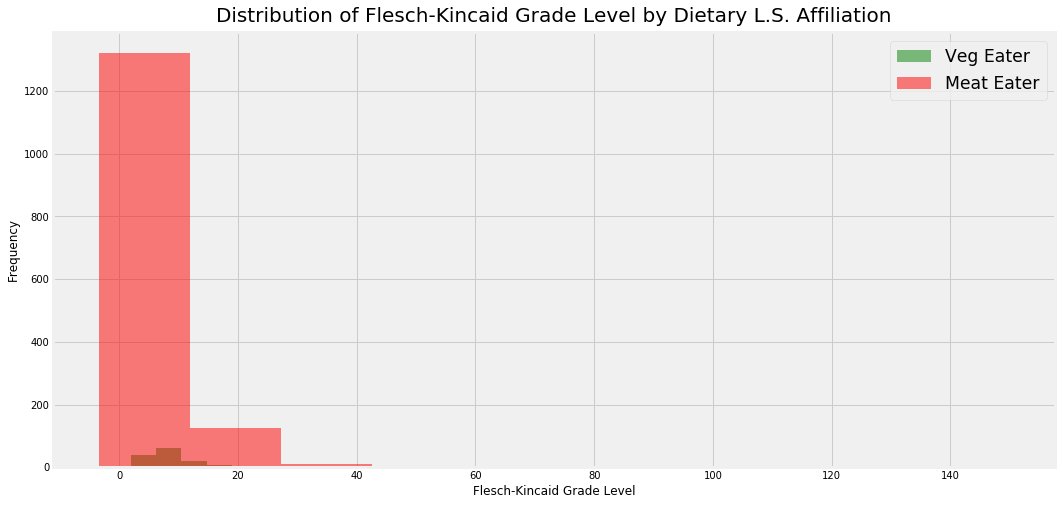

In [146]:

plt.figure(figsize = (16, 8))
df.loc[df['y_label'] == '1', 'grade_level'].hist(color = 'green', alpha = .5, label = 'Veg Eater')
df.loc[df['y_label'] == '0', 'grade_level'].hist(color = 'red', alpha = .5, label = 'Meat Eater')
plt.title('Distribution of Flesch-Kincaid Grade Level by Dietary L.S. Affiliation', fontsize = 20, y = 1.01)
plt.xlabel('Flesch-Kincaid Grade Level')
# plt.xlim([df['grade_level'].min(), df['grade_level'].max()])
plt.ylabel('Frequency')
plt.legend(loc = 'best', fontsize='xx-large');

In [125]:
# colors = {'R':'red', 'G':'green'}

# plt.figure(figsize = (16, 8))
# plt.title('Positive/Negative Polarity Score Difference vs. Neutral Polarity Score', fontsize = 20, y = 1.01)
# plt.xlabel('Neutral Polarity Score', fontsize = 15)
# plt.xlim([df['neu'].min(), 1.01])
# plt.ylabel('Positive Polarity Score - Negative Polarity Score', fontsize = 15)
# plt.ylim([df['diff'].min(), df['diff'].max()])

# x = df['neu']
# y = df['diff']
# area = df['word_count'] * .5

# diets = ['V','M']
# colors_list = ['green','red']

# recs = []
# for i in range(0,len(colors_list)):
#     recs.append(mpatches.Rectangle((0, 0), 1, 1, fc = colors_list[i]))
# plt.legend(recs, diets, loc = 'best')

# plt.annotate('*Point size proportional to word count of comment', (1,0), (-200, -25), \
#              xycoords = 'axes fraction', textcoords = 'offset points', va = 'top', fontsize = 13)

# plt.scatter(x, y, s = area, c = df['y_label'].apply(lambda x: colors[x]), alpha = 0.5)

# plt.show()

In [137]:
df.head()

,user,timestamp,commentText,y_label,likes,hasReplies,replies.commentText,preds,compound,neg,neu,pos,diff,reading_ease,grade_level,target,word_count
0,Yasmin Sallam,1556813178506,"Ok so I’m muslim, so we only eat halal foods,w...",0,0,False,NaN,0,0.2933,0.175,0.593,0.232,0.057,45.43,21.6,1,59
1,Tara Z,1556812818508,"As a vegan, I felt very uncomfortable with wat...",1,1,False,NaN,1,0.8346,0.135,0.598,0.267,0.132,69.18,6.2,1,53
2,QueenEm,1556807658510,"In all honesty, vegan eating is actually more ...",0,0,False,NaN,0,0.4569,0.000,0.834,0.166,0.166,68.26,6.6,1,23
3,Jenda Mh,1556804058512,"Enjoying my steak while watching this, remembe...",0,0,False,NaN,0,0.9042,0.000,0.621,0.379,0.379,63.02,10.7,1,25
4,Cavalio Thorson,1556800458514,That girl is the type to try and make me feel ...,0,2,False,NaN,0,-0.5423,0.132,0.868,0.000,-0.132,70.47,9.9,0,26


In [158]:
text = df['commentText']
text = text.transpose()
text.head()

0    Ok so I’m muslim, so we only eat halal foods,w...
1    As a vegan, I felt very uncomfortable with wat...
2    In all honesty, vegan eating is actually more ...
3    Enjoying my steak while watching this, remembe...
4    That girl is the type to try and make me feel ...
Name: commentText, dtype: object

In [152]:
stop_words = df['commentText'].ENGLISH_STOP_WORDS.union(add_stop_words)

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

AttributeError: 'Series' object has no attribute 'ENGLISH_STOP_WORDS'